In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
from decimal import Decimal

In [2]:
def stim_gen(i):
    global nf
    stim_vec = np.zeros(nf)
    if i is not None:
        stim_vec[i] = 1
    return stim_vec

class iSITH():
    def __init__(self, tau_min=.1, tau_max=3, buff_max=None, k=50, ntau=20, dt=1, g=0.0):
        super(iSITH, self).__init__()
        self.k = k
        self.tau_min = tau_min
        self.tau_max = tau_max
        if buff_max is None:
            buff_max = 3*tau_max
        self.buff_max = buff_max
        self.ntau = ntau
        self.dt = dt
        self.g = g

        c = (tau_max/tau_min)**(1./(ntau-1))-1
        tau_star = [Decimal(tau_min*(1+c)**tau) for tau in np.arange(ntau)]
        self.s = [Decimal(1/t_star) for t_star in tau_star]

class worker():
    def __init__(self, s, a, nf=2):
        self.a = a
        self.s = s
        self.M = np.zeros([nf,nf])
        self.F = np.zeros(nf)
        self.P = np.zeros(nf)
    def update(self, dt, fi_IN: None, f_IN: None, P_smax: float):
        if fi_IN is not None:
            self.F = self.F*np.exp(-self.s*dt) + f_IN
            P_IN = np.dot(self.M, f_IN)
            self.P = self.P*np.exp(self.s*dt) + P_IN - P_smax
            for past_stim in np.flatnonzero(self.F):
                if past_stim != fi_IN:
                    self.M[fi_IN,past_stim] = self.a*self.M[fi_IN,past_stim]+(1-self.a)*self.F[past_stim]
        else:
            self.F = self.F*np.exp(-self.s*dt)
            self.P = self.P*np.exp(self.s*dt)  - P_smax
        return (self.F, self.P)

In [3]:
# no. of stimuli
nf = 2
# variables
dt = 0.01
a = Decimal(0.5)
e = 0.0000005 #not a great value
S = iSITH(tau_min=0.1,tau_max=20,ntau=20).s

In [13]:
#stim presentation
tx1 = 0.5
ty = 3.5
tx2 = 8
#time steps
t_max = 11
T = np.arange(0,t_max, dt)

workers = []
predictions = np.zeros([len(S), nf])
for s in S:
    workers.append(worker(s, a))
    
P_ytrack = np.zeros(len(S))

f = [[0,tx1],[1,ty],[0,tx2],[0,t_max+dt]]
(stim, stim_t) = f.pop(0)

for t in T:
    if stim_t == t:
        fi_IN = stim
        f_IN = stim_gen(fi_IN)
        (stim, stim_t) = f.pop(0)
    else: 
        fi_IN = None
        f_IN = None
    F = np.zeros([len(S),nf])
    P = np.zeros([len(S),nf])
    for i in range(len(S)):
        (F[i], P[i]) = workers[i].update(dt=dt,fi_IN=fi_IN,f_IN=f_IN,P_smax=0)        
    P_ytrack = np.row_stack((P_ytrack, P[:,1]))

array([0.45241871, 0.46356352, 0.4721783 , 0.47880288, 0.48387705,
       0.4877521 , 0.49070476, 0.49295076, 0.49465701, 0.49595196,
       0.49693404, 0.49767842, 0.49824239, 0.49866954, 0.49899298,
       0.49923786, 0.49942322, 0.49956352, 0.4996697 , 0.49975006])

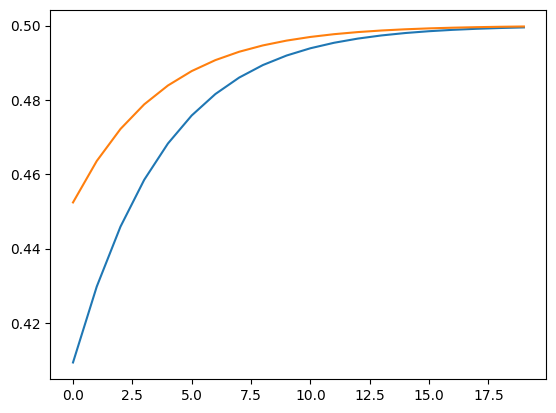

In [24]:
plt.plot(P_ytrack[-2]);
plt.plot(P_ytrack[-1]);
P_ytrack[-1]

In [15]:
#stim presentation
tx1 = 0.5
tx2 = 3.5
ty = 6.5
tx3 = 10
#time steps
t_max = 13
T = np.arange(0,t_max, dt)

workers = []
predictions = np.zeros([len(S), nf])
for s in S:
    workers.append(worker(s, a))
    
P_ytrack2 = np.zeros(len(S))

f = [[0,tx1],[0,tx2],[1,ty],[0,tx3],[0,t_max+dt]]
(stim, stim_t) = f.pop(0)

for t in T:
    if stim_t == t:
        fi_IN = stim
        f_IN = stim_gen(fi_IN)
        (stim, stim_t) = f.pop(0)
    else: 
        fi_IN = None
        f_IN = None
    F = np.zeros([len(S),nf])
    P = np.zeros([len(S),nf])
    for i in range(len(S)):
        (F[i], P[i]) = workers[i].update(dt=dt,fi_IN=fi_IN,f_IN=f_IN,P_smax=0)        
    P_ytrack2 = np.row_stack((P_ytrack, P[:,1]))

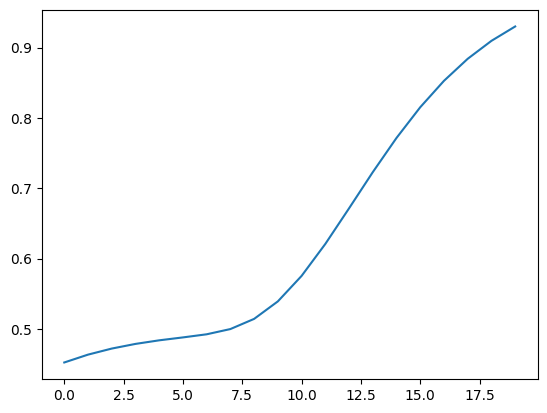

In [16]:
plt.plot(P_ytrack2[-1])

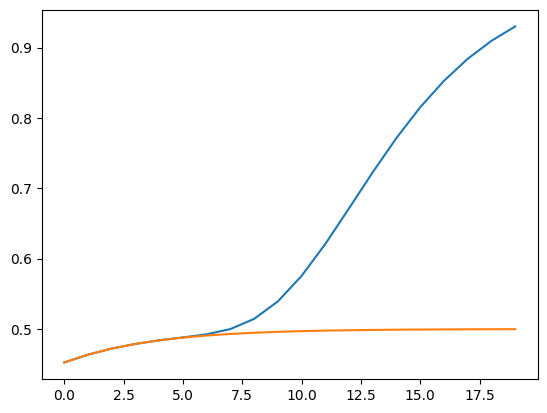

In [17]:
fig, ax = plt.subplots()
ax.plot(P_ytrack2[-1])
ax.plot(P_ytrack[-1])

array([4.23550084e-14, 6.42520481e-11, 1.64025882e-08, 1.08688173e-06,
       2.59561461e-05, 2.86380358e-04, 1.76157465e-03, 6.96407452e-03,
       1.97039376e-02, 4.32835120e-02, 7.85093246e-02, 1.23193882e-01,
       1.73236984e-01, 2.24214284e-01, 2.72536616e-01, 3.15907133e-01,
       3.53253642e-01, 3.84418789e-01, 4.09814320e-01, 4.30138865e-01])

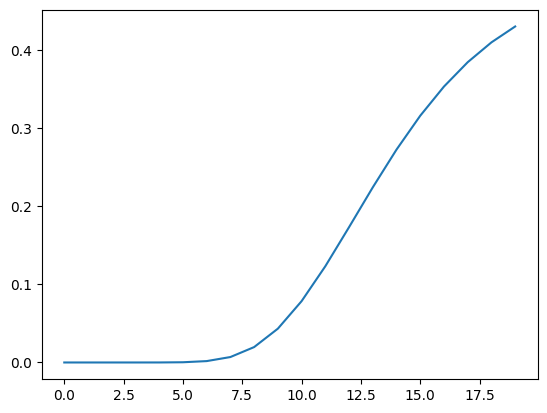

In [19]:
plt.plot(P_ytrack2[-1]-P_ytrack[-1])
P_ytrack2[-1]-P_ytrack[-1]

In [130]:
dt = 0.005
t1 = 5
t2 = 10
P = np.zeros(len(S))
T = np.arange(0,5,dt)
P = np.longdouble(np.zeros(len(S)))
for i in range(len(S)):
    P[i] = np.longdouble(0.5*np.exp(-S[i]*t1)+0.5*np.exp(-S[i]*t2))

In [131]:
P[0]

9.643749239819615682e-23

In [132]:
Pt = np.longdouble(np.zeros(len(S)))
for t in T:
    for i in range(len(S)):
        P[i] = np.longdouble(P[i]*np.exp(S[i]*dt))
    if t == 5.0:
        P = P - 0.5*np.exp(-S[0]*5)
    Pt = np.row_stack((Pt, P))

In [4]:
alpha = Decimal(a*np.exp(-S[0]*5))+Decimal(a*np.exp(-S[0]*10))

In [5]:
alpha

Decimal('9.643749239819615681869698488E-23')

In [6]:
beta = alpha*Decimal(np.exp(S[0]*5))
#(beta - a)*Decimal(np.exp(S[0]*5))

In [28]:
t3 =(Decimal(S[0])*Decimal(-0.003)).exp()
t2 =(Decimal(S[0])*Decimal(-0.002)).exp()
t1 =(Decimal(S[0])*Decimal(-0.001)).exp()

In [43]:
(Decimal(S[0])*Decimal(-0.10)).exp() + (Decimal(S[0])*Decimal(-0.30)).exp()

Decimal('0.4176665095393062783935535935')

In [44]:
(Decimal(S[1])*Decimal(-0.10)).exp() + (Decimal(S[1])*Decimal(-0.30)).exp()

Decimal('0.5725556323412371609620005885')

In [53]:
(Decimal(S[-1])*Decimal(-0.10)).exp()

Decimal('0.9950124791926823166113872506')

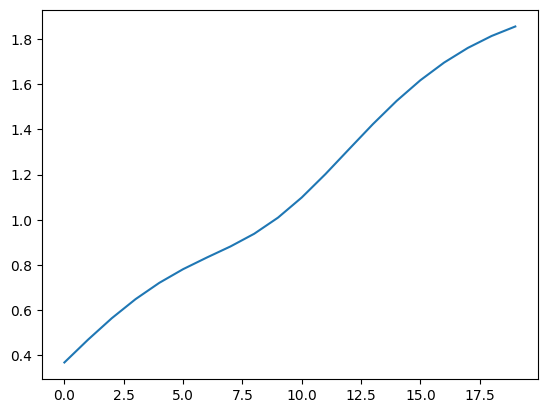

In [56]:
P = []
for i in S:
    P = np.append(P, Decimal(Decimal(-0.1)*i).exp() + Decimal(Decimal(-3)*i).exp())
plt.plot(P)

In [50]:
P[1] - P[0]

Decimal('3.712126923739702931608021376E-17')